In [3]:
import pandas as pd
import numpy as np
from sklearn.utils import resample

In [4]:
df = pd.read_csv(r'https://s3.us.cloud-object-storage.appdomain.cloud/cf-courses-data/CognitiveClass/DP0701EN/version-2/Data-Collisions.csv')

/opt/conda/envs/Python36/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3020: DtypeWarning: Columns (33) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [5]:
df.head()

,SEVERITYCODE,X,Y,OBJECTID,INCKEY,COLDETKEY,REPORTNO,STATUS,ADDRTYPE,INTKEY,...,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SDOTCOLNUM,SPEEDING,ST_COLCODE,ST_COLDESC,SEGLANEKEY,CROSSWALKKEY,HITPARKEDCAR
0,2,-122.323148,47.703140,1,1307,1307,3502005,Matched,Intersection,37475.0,...,Wet,Daylight,NaN,NaN,NaN,10,Entering at angle,0,0,N
1,1,-122.347294,47.647172,2,52200,52200,2607959,Matched,Block,NaN,...,Wet,Dark - Street Lights On,NaN,6354039.0,NaN,11,From same direction - both going straight - bo...,0,0,N
2,1,-122.334540,47.607871,3,26700,26700,1482393,Matched,Block,NaN,...,Dry,Daylight,NaN,4323031.0,NaN,32,One parked--one moving,0,0,N
3,1,-122.334803,47.604803,4,1144,1144,3503937,Matched,Block,NaN,...,Dry,Daylight,NaN,NaN,NaN,23,From same direction - all others,0,0,N
4,2,-122.306426,47.545739,5,17700,17700,1807429,Matched,Intersection,34387.0,...,Wet,Daylight,NaN,4028032.0,NaN,10,Entering at angle,0,0,N


In [6]:
df.columns

Index(['SEVERITYCODE', 'X', 'Y', 'OBJECTID', 'INCKEY', 'COLDETKEY', 'REPORTNO',
       'STATUS', 'ADDRTYPE', 'INTKEY', 'LOCATION', 'EXCEPTRSNCODE',
       'EXCEPTRSNDESC', 'SEVERITYCODE.1', 'SEVERITYDESC', 'COLLISIONTYPE',
       'PERSONCOUNT', 'PEDCOUNT', 'PEDCYLCOUNT', 'VEHCOUNT', 'INCDATE',
       'INCDTTM', 'JUNCTIONTYPE', 'SDOT_COLCODE', 'SDOT_COLDESC',
       'INATTENTIONIND', 'UNDERINFL', 'WEATHER', 'ROADCOND', 'LIGHTCOND',
       'PEDROWNOTGRNT', 'SDOTCOLNUM', 'SPEEDING', 'ST_COLCODE', 'ST_COLDESC',
       'SEGLANEKEY', 'CROSSWALKKEY', 'HITPARKEDCAR'],
      dtype='object')

In [7]:
df['UNDERINFL'].value_counts()

N    100274
0     80394
Y      5126
1      3995
Name: UNDERINFL, dtype: int64

In [8]:
df['INATTENTIONIND'].value_counts()

Y    29805
Name: INATTENTIONIND, dtype: int64

In [9]:
df['SPEEDING'].value_counts()

Y    9333
Name: SPEEDING, dtype: int64

In [10]:
df1 = df[['SEVERITYCODE','INATTENTIONIND', 'UNDERINFL', 'WEATHER', 'ROADCOND', 'LIGHTCOND', 'SPEEDING']]
df1.shape

(194673, 7)

In [11]:
df2 = df1[df1.INATTENTIONIND != 'Y']
print(df2.shape)
df3 = df2[df2.UNDERINFL != 'Y']
print(df3.shape)
df4 =df3[df3.SPEEDING != 'Y']
print(df4.shape)
df5 = df4[df4.UNDERINFL != 1]
print(df5.shape)
df5['SEVERITYCODE'].value_counts()

(164868, 7)
(160377, 7)
(152293, 7)
(152293, 7)


1    109185
2     43108
Name: SEVERITYCODE, dtype: int64

In [12]:
df5['LIGHTCOND'].value_counts()

Daylight                    90044
Dark - Street Lights On     35646
Unknown                     12712
Dusk                         4644
Dawn                         1881
Dark - No Street Lights      1175
Dark - Street Lights Off      879
Other                         192
Dark - Unknown Lighting        11
Name: LIGHTCOND, dtype: int64

In [13]:
dfmajor = df5[df5.SEVERITYCODE == 1]
dfminor = df5[df5.SEVERITYCODE == 2]

df_majority_downsampled = resample(dfmajor, 
                                 replace=False,    # sample without replacement
                                 n_samples=43108,     # to match minority class
                                 random_state=1) 
df5 = pd.concat([dfminor, df_majority_downsampled])

In [14]:
print(df5.shape,pd.isna(df5['LIGHTCOND']).sum(),pd.isna(df5['ROADCOND']).sum(),pd.isna(df5['WEATHER']).sum())

(86216, 7) 2659 2591 2619


In [15]:
df6 = df5.dropna(subset = ['LIGHTCOND','ROADCOND','WEATHER'],axis = 0)

In [16]:
df6.shape

(83494, 7)

In [17]:
df6['WEATHER'].replace(to_replace= df6['WEATHER'].unique(), value=list(range(0,11)),inplace=True)
df6['LIGHTCOND'].replace(to_replace= df6['LIGHTCOND'].unique(), value=list(range(0,9)),inplace=True)
df6['ROADCOND'].replace(to_replace= df6['ROADCOND'].unique(), value=list(range(0,9)),inplace=True)

/opt/conda/envs/Python36/lib/python3.6/site-packages/pandas/core/generic.py:6586: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


In [18]:
df6['LIGHTCOND'].value_counts()
df6.columns

Index(['SEVERITYCODE', 'INATTENTIONIND', 'UNDERINFL', 'WEATHER', 'ROADCOND',
       'LIGHTCOND', 'SPEEDING'],
      dtype='object')

In [23]:
X = df6[['LIGHTCOND','ROADCOND','WEATHER']].values
y = df6['SEVERITYCODE']

In [20]:
import itertools
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter
import pandas as pd
import numpy as np
import matplotlib.ticker as ticker
from sklearn import preprocessing
%matplotlib inline

In [24]:
X= preprocessing.StandardScaler().fit(X).transform(X.astype(float))

/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [25]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (66795, 3) (66795,)
Test set: (16699, 3) (16699,)


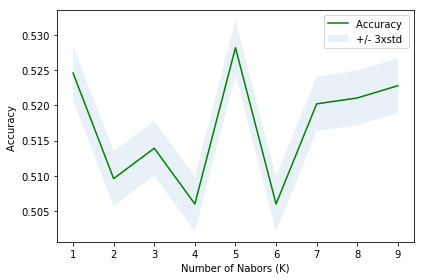

In [26]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
Ks = 10
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))
ConfustionMx = [];
for n in range(1,Ks):
    
    #Train Model and Predict  
    neigh = KNeighborsClassifier(n_neighbors = n).fit(X_train,y_train)
    yhat=neigh.predict(X_test)
    mean_acc[n-1] = metrics.accuracy_score(y_test, yhat)

    
    std_acc[n-1]=np.std(yhat==y_test)/np.sqrt(yhat.shape[0])

mean_acc
plt.plot(range(1,Ks),mean_acc,'g')
plt.fill_between(range(1,Ks),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.10)
plt.legend(('Accuracy ', '+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Nabors (K)')
plt.tight_layout()
plt.show()

In [27]:
k = 5
#Train Model and Predict  
neigh = KNeighborsClassifier(n_neighbors = k).fit(X_train,y_train)
yhat = neigh.predict(X_test)

In [41]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import f1_score
drugTree = DecisionTreeClassifier(criterion="entropy", max_depth = None)
drugTree.fit(X_train,y_train)
predTree = drugTree.predict(X_test)
print("DecisionTrees's Accuracy: ", metrics.accuracy_score(y_test, predTree))
f1_score(y_test, predTree, average='weighted') 

DecisionTrees's Accuracy:  0.5734475118270556


0.547019737471866

In [29]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
LR = LogisticRegression(C=0.01, solver='liblinear').fit(X_train,y_train)
yhatLR = LR.predict(X_test)
yhat_prob = LR.predict_proba(X_test)
from sklearn.metrics import jaccard_similarity_score
jaccard_similarity_score(y_test, yhatLR)

0.5673393616384215

In [30]:
from sklearn.metrics import log_loss
log_loss(y_test, yhat_prob)

0.6776410200106512

In [31]:
from sklearn import svm
clf = svm.SVC(kernel='linear')
clf.fit(X_train, y_train) 
yhatSVM = clf.predict(X_test)
from sklearn.metrics import f1_score
f1_score(y_test, yhatSVM, average='weighted') 

0.5064612597360043

In [32]:
from sklearn.metrics import jaccard_similarity_score
jaccard_similarity_score(y_test, yhatSVM)

0.5670998263369064

In [33]:
J =[]
F1 = []
LL = []
J.append(jaccard_similarity_score(y_test, yhat))
F1.append(f1_score(y_test, yhat, average='weighted')) 
LL.append('N/A')
J.append(jaccard_similarity_score(y_test, predTree))
F1.append(f1_score(y_test, predTree, average='weighted')) 
LL.append('N/A')
J.append(jaccard_similarity_score(y_test, yhatSVM))
F1.append(f1_score(y_test, yhatSVM, average='weighted')) 
LL.append('N/A')
J.append(jaccard_similarity_score(y_test, yhatLR))
F1.append(f1_score(y_test, yhatLR, average='weighted')) 
LL.append(log_loss(y_test, yhat_prob))
Algorithm = ['KNN','Decision Tree','SVM','LogisticRegression']
J ,F1,LL
data = {'Algorithm': Algorithm,'Jaccard': J,'F1-score':F1,'LogLoss':LL}
pd.DataFrame(data)

,Algorithm,Jaccard,F1-score,LogLoss
0,KNN,0.528175,0.508553,N/A
1,Decision Tree,0.572968,0.547148,N/A
2,SVM,0.567100,0.506461,N/A
3,LogisticRegression,0.567339,0.544530,0.677641
